PROYECTO INDIVIDUAL #2 <br>
Elaborado por : Jean Carlos Betancourt Nazareno 

Descripción:
El CDC (centro de control y prevención de enfermedades) de EE. UU. es la entidad encargada de monitorear la salud pública y desarrollar estrategias para la prevención y control de enfermedades. Por esto ha contratado a nuestra consultora para organizar, en base a los datos recolectados, los recursos hospitalarios para prevenir que lo ocurrido durante la pandemia COVID-19 suceda de vuelta.

Importe de Librerias 

In [1]:
import pandas as pd
from sodapy import Socrata 
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

Se realiza la obtención de los datos 

In [2]:
# se realiza la solicitud mediante un token de aplicación 
client =Socrata(
    "healthdata.gov",
    "NBBTwYrdJVPPtqqTQHjik7eOW",
    username="jeankarlos.96.jcbn@gmail.com",
    password="Contraseña",
    timeout=10

)

In [ ]:
results = client.get_all("g62h-syeh")

# Convierte a pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
# tiempo mas corto para este caso
results= client.get("g62h-syeh",limit=100000)
results_df = pd.DataFrame.from_records(results)

Obtención de los datos mediante un archivo .CSV 

In [3]:
results=pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')
results_df=pd.DataFrame(results)
results_df

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,VT,2020/10/16,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,0.0,1,19.0,1,33.0,1
1,VI,2020/10/15,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/10/14,9,49,7,9,49,7,0.0,64,...,NaN,0,NaN,0,0.0,1,4.0,1,15.0,1
3,VI,2020/10/13,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,AL,2020/10/10,33,79,2,35,77,2,13.0,112,...,NaN,0,NaN,0,0.0,8,0.0,8,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47580,AK,2022/02/01,1,19,2,6,14,2,10.0,22,...,0.0,16,0.0,21,1.0,17,5.0,17,5.0,17
47581,FL,2022/02/10,9,190,72,39,171,61,219.0,265,...,11.0,251,36.0,265,33.0,265,726.0,265,1032.0,265
47582,HI,2022/01/29,3,18,5,4,18,4,11.0,26,...,0.0,18,1.0,23,0.0,19,67.0,20,97.0,20
47583,PR,2022/02/13,0,13,54,2,11,54,4.0,66,...,0.0,66,0.0,66,0.0,66,35.0,66,94.0,54


Se crea un dicccionario en el cual se puedan almacenar los datos de las columnas las cuales son relevantes para el analsis 

In [7]:
dicc={}
dicc['Estado']=results_df.state
dicc['Fecha']= results_df.date
#total camas incluido todos los tipos
dicc['TotalCamas']=results_df.inpatient_beds
#total de camas de hospitalización con personal que están ocupadas.
dicc['TotalCamasOcupadas']=results_df.inpatient_beds_used
#Total de camas de hospitalizacion para covid
dicc['TotalCamas_Covid']=results_df.inpatient_beds_used_covid
#camas UCI para adultos hospitalizados ocupadas
dicc['totalcamasUCI']=results_df.staffed_adult_icu_bed_occupancy
#cama hospitalizacion ocupada, SOSPECHADO o CONFIRMADO COVID-19 actualmente
#dicc['CH_Conf_Sosp']=results_df.inpatient_beds_used_covid
#cama hospitalizacion, CONFIRMADO COVID-19 el dia anterior 
#dicc['CH_Conf_Anterior']=results_df.previous_day_admission_adult_covid_confirmed
#cama hospitalizacion, SOSPECHADO COVID-19 el dia anteiror
#dicc['CH_Sosp_Anterior']=results_df.previous_day_admission_adult_covid_suspected
#cama hosp, ucin, ucip, recien nacido y guarderia, CONFIRMADO COVID-19 el dia anterior
#dicc['CH_Conf_Pedia_Anterior']=results_df.previous_day_admission_pediatric_covid_confirmed

#camas UCI, SOSPECHADO o CONFIRMADO COVID-19 actualmente 
#dicc['UCI_Conf_Sosp']=results_df.staffed_icu_adult_patients_confirmed_and_suspected_covid
#camas UCI, CONFIRMADO COVID-19 actualmente 
dicc['UCI_Conf']=results_df.staffed_icu_adult_patients_confirmed_covid
#cama hospitalizacion, SOSPECHADO o CONFIRMADO COVID-19 por laboratorio
#dicc['CH_Conf_Sosp_lab']=results_df.total_adult_patients_hospitalized_confirmed_and_suspected_covid
#cama hospitalizacion, CONFIRMADO COVID-19 por laboratorio actual
dicc['CH_Conf_lab_total']=results_df.total_adult_patients_hospitalized_confirmed_covid
#cama hospitalizacion pediatrica,ucin, recien nacido y guarderia,CONFIRMADO COVID-19 por laboratorio actual
dicc['CH_Conf_Pedia_lab_total']=results_df.total_pediatric_patients_hospitalized_confirmed_covid
##cama hospitalizacion pediatrica,ucin, recien nacido y guarderia,SOSPECHADO o CONFIRMADO COVID-19 por laboratorio actualmente
dicc['C_Conf_Sos_Pedia_Lab_Total']=results_df.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid
#camas UCI para adultos hospitalizados total(total de camas)
#dicc['totalUCI']=results_df.total_staffed_adult_icu_beds



In [8]:
#convierto el diccionario a dataframe 
df=pd.DataFrame(dicc)

In [10]:
df

,Estado,Fecha,TotalCamas,TotalCamasOcupadas,TotalCamas_Covid,totalcamasUCI,UCI_Conf,CH_Conf_lab_total,CH_Conf_Pedia_lab_total,C_Conf_Sos_Pedia_Lab_Total
0,VT,2020/10/16,1301.0,901.0,2.0,75.0,0.0,0.0,0.0,1.0
1,VI,2020/10/15,188.0,98.0,4.0,10.0,1.0,4.0,0.0,0.0
2,PR,2020/10/14,9743.0,5367.0,384.0,470.0,45.0,202.0,10.0,35.0
3,VI,2020/10/13,188.0,94.0,4.0,10.0,1.0,4.0,0.0,0.0
4,AL,2020/10/10,15210.0,10764.0,983.0,1297.0,270.0,805.0,17.0,22.0
...,...,...,...,...,...,...,...,...,...,...
47580,AK,2022/02/01,1358.0,1001.0,154.0,98.0,18.0,143.0,7.0,9.0
47581,FL,2022/02/10,61174.0,49656.0,6288.0,5404.0,992.0,5797.0,150.0,165.0
47582,HI,2022/01/29,2594.0,2006.0,383.0,168.0,61.0,355.0,8.0,11.0
47583,PR,2022/02/13,8003.0,5652.0,220.0,467.0,40.0,185.0,2.0,11.0


Normalización de los datos para su posterior uso y análisis 

In [11]:
#Convertir el formato de la fecha 
df.Fecha=pd.to_datetime(df.Fecha,format='%Y-%m-%d')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47585 entries, 0 to 47584
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Estado                      47585 non-null  object        
 1   Fecha                       47585 non-null  datetime64[ns]
 2   TotalCamas                  47580 non-null  float64       
 3   TotalCamasOcupadas          47321 non-null  float64       
 4   TotalCamas_Covid            47501 non-null  float64       
 5   totalcamasUCI               40389 non-null  float64       
 6   UCI_Conf                    40619 non-null  float64       
 7   CH_Conf_lab_total           41064 non-null  float64       
 8   CH_Conf_Pedia_lab_total     40386 non-null  float64       
 9   C_Conf_Sos_Pedia_Lab_Total  40386 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 3.6+ MB


In [13]:
# cambio todos los NaN por el valor 0
df=df.fillna(0)

In [14]:
df['TotalCamas']=df['TotalCamas'].astype('int64')
df['TotalCamasOcupadas']=df['TotalCamasOcupadas'].astype('int64')
df['TotalCamas_Covid']=df['TotalCamas_Covid'].astype('int64')
df['totalcamasUCI']=df['totalcamasUCI'].astype('int64')
df['UCI_Conf']=df['UCI_Conf'].astype('int64')
df['CH_Conf_lab_total']=df['CH_Conf_lab_total'].astype('int64')
df['CH_Conf_Pedia_lab_total']=df['CH_Conf_Pedia_lab_total'].astype('int64')
df['C_Conf_Sos_Pedia_Lab_Total']=df['C_Conf_Sos_Pedia_Lab_Total'].astype('int64')


Para Obtener los 5 estados con mayor Ocupación Hospitalaria por COVID primero es necesario aplicar un filtro en cual permita obtener el periodo de tiempo deseado y asi obtener un dataframe con los datos deseados 

In [37]:
dffil=df[df.Fecha < '2020-07-01T00:00:00.000']   # filtro de la fecha año 2020 los primeros 6 meses 
dffil=dffil.sort_values(by='Fecha',ignore_index=True)
dffil.reset_index(drop=True)

,Estado,Fecha,TotalCamas,TotalCamasOcupadas,TotalCamas_Covid,totalcamasUCI,UCI_Conf,CH_Conf_lab_total,CH_Conf_Pedia_lab_total
0,LA,2020-01-01,0,0,0,0,0,0,0
1,PR,2020-01-01,146,61,0,0,0,0,0
2,IN,2020-01-01,30,15,0,0,0,0,0
3,MN,2020-01-01,46,0,0,0,0,0,0
4,NC,2020-01-01,72,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6689,NE,2020-06-30,5278,3128,159,0,2,16,0
6690,ID,2020-06-30,3862,1770,61,0,0,0,0
6691,NJ,2020-06-30,16521,11213,1048,0,0,0,0
6692,KS,2020-06-30,8235,4317,211,0,0,0,0


In [38]:
dffil     # dataframe filtrado por fecha de los primeros 6 meses del 2020

,Estado,Fecha,TotalCamas,TotalCamasOcupadas,TotalCamas_Covid,totalcamasUCI,UCI_Conf,CH_Conf_lab_total,CH_Conf_Pedia_lab_total
0,LA,2020-01-01,0,0,0,0,0,0,0
1,PR,2020-01-01,146,61,0,0,0,0,0
2,IN,2020-01-01,30,15,0,0,0,0,0
3,MN,2020-01-01,46,0,0,0,0,0,0
4,NC,2020-01-01,72,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6689,NE,2020-06-30,5278,3128,159,0,2,16,0
6690,ID,2020-06-30,3862,1770,61,0,0,0,0
6691,NJ,2020-06-30,16521,11213,1048,0,0,0,0
6692,KS,2020-06-30,8235,4317,211,0,0,0,0


Se propuso que para obtener el estado con mayor ocupacion hospitalaria por COVID, se debia determinar el total de camas por estado y luego igualmente determinar el total de camas el cual estan siendo ocupadas por pacientes por COVID, para asi obtener el porcentaje de ocuapacion por estado.

In [39]:
d=dffil.groupby(['Estado'],as_index=False).sum()   # suma total camas por estado
d=d.sort_values(by='TotalCamas_Covid',ascending=False)
d.reset_index(drop=True,inplace=True)
d.iloc[:5]

,Estado,TotalCamas,TotalCamasOcupadas,TotalCamas_Covid,totalcamasUCI,UCI_Conf,CH_Conf_lab_total,CH_Conf_Pedia_lab_total
0,NY,3229338,2221592,686528,0,0,87,0
1,CA,5388790,3083310,434721,0,0,36134,0
2,FL,3556405,2223756,322227,0,0,0,0
3,TX,4598425,2525448,246237,0,0,0,0
4,IL,2366567,1359536,214010,0,0,0,0


In [40]:
d['Porc_Ocupacion_Covid']=(d.TotalCamas_Covid/d.TotalCamas) # calcula el porcentaje total por estado
d=d.sort_values(by='Porc_Ocupacion_Covid',ascending=False).iloc[:5]

In [41]:
d

,Estado,TotalCamas,TotalCamasOcupadas,TotalCamas_Covid,totalcamasUCI,UCI_Conf,CH_Conf_lab_total,CH_Conf_Pedia_lab_total,Porc_Ocupacion_Covid
0,NY,3229338,2221592,686528,0,0,87,0,0.212591
6,NJ,1005128,649607,188728,0,0,0,0,0.187765
11,MD,681761,537721,121379,0,0,0,0,0.178037
12,LA,737339,425949,117467,0,0,40452,0,0.159312
5,MA,1234273,913225,195851,0,0,0,0,0.158677


<function matplotlib.pyplot.show(close=None, block=None)>

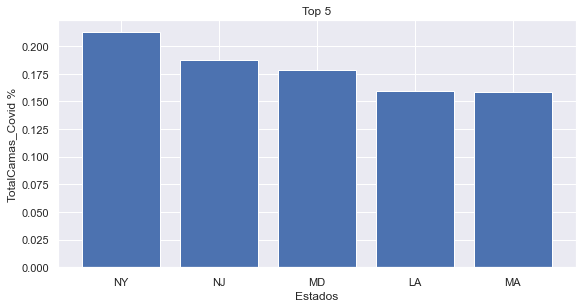

In [42]:
x=d.Estado.iloc[:5]
y=d.Porc_Ocupacion_Covid.iloc[:5]

## Creamos Gráfica
plt.bar(x,y)
plt.gcf().set_size_inches(8,4)
plt.tight_layout()
plt.ylabel('TotalCamas_Covid %')
plt.xlabel('Estados')
plt.title('Top 5')
plt.xticks(rotation=0)
plt.show


Grafica de ocupacion hospitalaria por estado en el cual se puede apreciar que para los primeros 6 meses del año 2020, los 5 estados con mayor ocupación eran NY, NJ, MD, LA, MA, pero teniendo en cuenta que de forma general estos porcentajes no llegan a ser muy altos debido a que eran inicios de pandemia, pero ya empesaba a verse un aumento en los casos que empesaban a desbordar los servicios hospitalarios.

para analizar la influencia del rango etario en este comportamiento los datos presentes en este periodo de tiempo ( 6 primeros meses del 2020) no son suficiente para poder ser deterministas en algun sentido, por este motivo no se podria ver la influencia en este caso. a diferencia de lo que se conoce del COVID-19 que afecta principalmente al adulto mayor y a niños. 

Se crea un dataframae solo para analizar los datos pertenecientes al estado de New York y asi determinar la ocupacion de camas(común) por COVID en este Estado.

In [ ]:
df_NY=df.sort_values(by='Fecha',ascending=True)
df_NY=df_NY[df_NY.Estado == 'NY']         #solo los datos registrados de NY New York
df_NY.info()

In [256]:
df_NY.drop(['totalcamasUCI','UCI_Conf',],axis=1,inplace=True)

In [258]:
#filtro fechas peridodo cuarentena 
fecha_ini= pd.to_datetime('2020-03-22T00:00:00.000')  
fecha_fin= pd.to_datetime('2020-09-22T00:00:00.000')

df_NYf1=df_NY[(df_NY.Fecha > fecha_ini) & (df_NY.Fecha < fecha_fin)]

fecha_ini= pd.to_datetime('2020-09-22T00:00:00.000')  
fecha_fin= pd.to_datetime('2021-07-22T00:00:00.000')

df_NYf2=df_NY[(df_NY.Fecha > fecha_ini) & (df_NY.Fecha < fecha_fin)]


In [259]:
minimo1=min(df_NYf1.TotalCamas_Covid)
maximo1=max(df_NYf1.TotalCamas_Covid)
minimo2=min(df_NYf2.TotalCamas_Covid)
maximo2=max(df_NYf2.TotalCamas_Covid)


Se Grafica en unos intervalos de tiempo definidos para ver el comportamiento de la ocupacion de estos recursos por COVID  y se obtienen los valores maximos y minimos en estos periodos de tiempo 

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

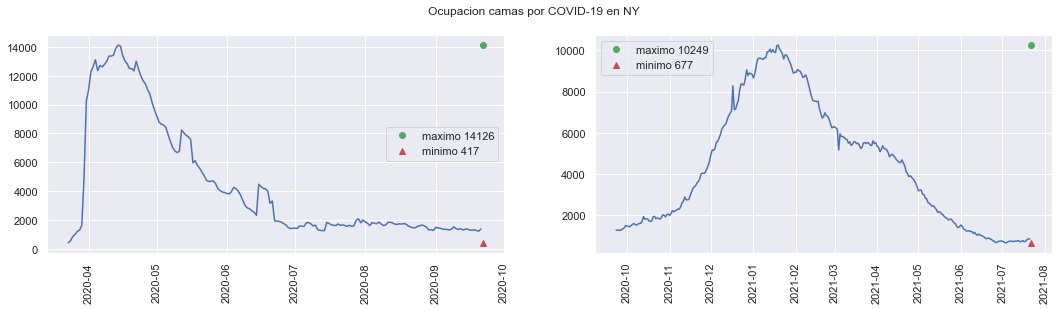

In [262]:
x1=df_NYf1.Fecha
y1=df_NYf1.TotalCamas_Covid

x2=df_NYf2.Fecha
y2=df_NYf2.TotalCamas_Covid

plt.subplot(1,2,1)
plt.plot(pd.to_datetime('2020-09-22T00:00:00.000') ,maximo1,'go')
plt.plot(pd.to_datetime('2020-09-22T00:00:00.000') ,minimo1,'r^')
plt.plot(x1,y1)
plt.legend(['maximo'+' '+str(maximo1),'minimo'+' '+str(minimo1)])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.plot(pd.to_datetime('2021-07-22T00:00:00.000') ,maximo2,'go')
plt.plot(pd.to_datetime('2021-07-22T00:00:00.000') ,minimo2,'r^')
plt.plot(x2,y2)
plt.legend(['maximo'+' '+str(maximo2),'minimo'+' '+str(minimo2)])

plt.suptitle('Ocupacion camas por COVID-19 en NY')
plt.gcf().set_size_inches(18,4)
plt.xticks(rotation=90)

plt.imshow

se pueden apreciar algunos picos en unas fechas en concreto siendo la primera de ellas cuando empezaba el perido de la pandemia en Estados Unidos, llegando a una ocupación de camas por covid en un periodo corto, en conparación con el resto de tiempo.

In [49]:
#filtro fechas peridodo cuarentena 
fecha_ini= pd.to_datetime('2020-03-22T00:00:00.000')  
fecha_fin= pd.to_datetime('2022-04-22T00:00:00.000')

df_NYf=df_NY[(df_NY.Fecha > fecha_ini) & (df_NY.Fecha < fecha_fin)]

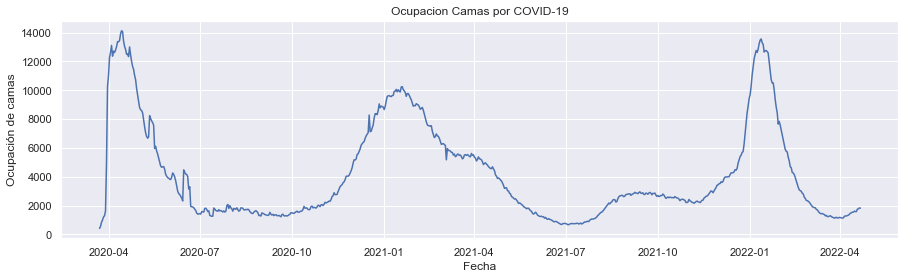

In [50]:
x=df_NYf.Fecha
y=df_NYf.TotalCamas_Covid
fig = plt.figure()
ax = plt.axes()

ax.plot(x,y)
ax.set(xlabel='Fecha',ylabel='Ocupación de camas',title='Ocupacion Camas por COVID-19')
plt.gcf().set_size_inches(15,4)
#plt.xticks(rotation=90)

los cinco estados que mas camas UCI utilizaron durante el año 2020

In [52]:
# 4 filtro para el año 2020
df_UCI=df
df_UCI.sort_values(by='Fecha',ascending=True)
df_UCI=df_UCI.drop(['TotalCamas', 'TotalCamasOcupadas','TotalCamas_Covid','CH_Conf_lab_total','CH_Conf_Pedia_lab_total'],axis=1)
df_UCI_5=df_UCI
# 4 filtro para el año 2020
fecha=pd.to_datetime('2021-01-01T00:00:00.000')
df_UCI=df_UCI[df_UCI.Fecha < fecha]
df_UCI=df_UCI.groupby(by='Estado',as_index=False).sum()
df_UCI=df_UCI.sort_values(by='totalcamasUCI',ascending=False)
df_UCI.iloc[:5]

,Estado,totalcamasUCI,UCI_Conf
44,TX,991193,335836
4,CA,901654,260865
9,FL,799385,175858
34,NY,495350,61589
38,PA,465537,84227


los 5 estados con mayor ocupación de camas UCI para el año 2020, principalmente se pueden apreciar estados del sur como Texas, Florida y California las cuales cuentan con una ocupacion alta de camas UCI, esto probablemente se deba a que estos estados se volvieron epicentros de la pandemia en el país y por otro lado por una relajación de las cuarentenas en la mayoria de estados. tal como lo indica el doctor Anthony Fauci, jefe de Epidemiologia del instituto Nacional de Salud de EE,UU. 

<function matplotlib.pyplot.show(close=None, block=None)>

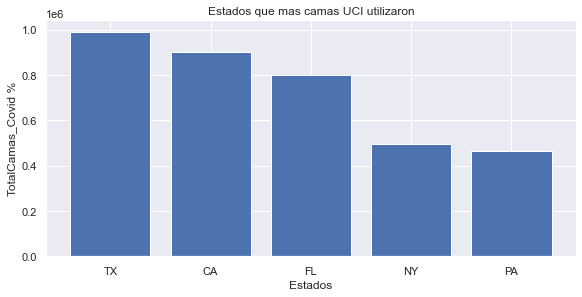

In [53]:
x=df_UCI.Estado.iloc[:5]
y=df_UCI.totalcamasUCI.iloc[:5]

## Creamos Gráfica
plt.bar(x,y)
plt.gcf().set_size_inches(8,4)
plt.tight_layout()
plt.ylabel('TotalCamas_Covid')
plt.xlabel('Estados')
plt.title('Estados que mas camas UCI utilizaron')
plt.xticks(rotation=0)
plt.show

Grafico con los 5 estados con mayor ocupación de camas UCI

Cantidad de camas que se utilizaron, por Estado, para pacientes pediatricos con COVID durante el 2020

In [87]:
Periodo_Fecha= '2021-01-01T00:00:00.000'
df_Ped=df[df.Fecha < Periodo_Fecha]
df_Ped=df_Ped.sort_values(by='Fecha',ascending=True)
df_Ped=df_Ped.drop(['TotalCamas_Covid', 'totalcamasUCI', 'UCI_Conf', 'CH_Conf_lab_total'],axis=1)
df_Ped

,Estado,Fecha,TotalCamas,TotalCamasOcupadas,CH_Conf_Pedia_lab_total,C_Conf_Sos_Pedia_Lab_Total
20902,MN,2020-01-01,46,0,0,0
18043,NC,2020-01-01,72,0,0,0
70,AL,2020-01-01,6,0,0,0
16213,PR,2020-01-01,146,61,0,0
20882,IN,2020-01-01,30,15,0,0
...,...,...,...,...,...,...
42261,MT,2020-12-31,3171,2117,2,2
35700,ME,2020-12-31,3266,2247,3,4
41860,KS,2020-12-31,8866,5442,1,2
34517,UT,2020-12-31,6239,3737,1,13


In [88]:
df_Ped=df_Ped.groupby(by='Estado',as_index=False).sum()
df_Ped

,Estado,TotalCamas,TotalCamasOcupadas,CH_Conf_Pedia_lab_total,C_Conf_Sos_Pedia_Lab_Total
0,AK,420987,244102,351,476
1,AL,3756261,2590217,3001,4421
2,AR,2293706,1454931,1723,4108
3,AZ,3331380,2517623,5786,7336
4,CA,17010874,11316300,10031,15207
5,CO,2446292,1577653,3338,5515
6,CT,2257442,1516595,598,1197
7,DC,858939,641268,934,2961
8,DE,761810,533908,538,743
9,FL,15896646,10133701,7391,46224


<function matplotlib.pyplot.show(close=None, block=None)>

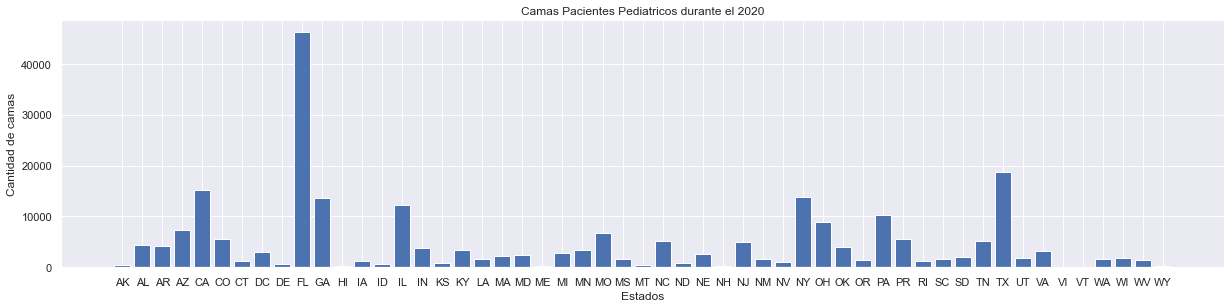

In [91]:
x=df_Ped.Estado
y=df_Ped.C_Conf_Sos_Pedia_Lab_Total
#y=df_Ped.CH_Conf_Pedia_lab_total

## Creamos Gráfica
plt.bar(x,y)
plt.gcf().set_size_inches(17,4)
plt.tight_layout()
plt.ylabel('Cantidad de camas')
plt.xlabel('Estados')
plt.title('Camas Pacientes Pediatricos durante el 2020')
plt.xticks(rotation=0)
plt.show

el grafico muestra el total de camas utilizadas, por cada uno de los Estados para pacientes pediatricos con COVID durante el 2020, viendose una notable ocupación de estas en Florida, Texas y California principalmente, siendo estos los epicentros de la pandemia para el pais.

<function matplotlib.pyplot.show(close=None, block=None)>

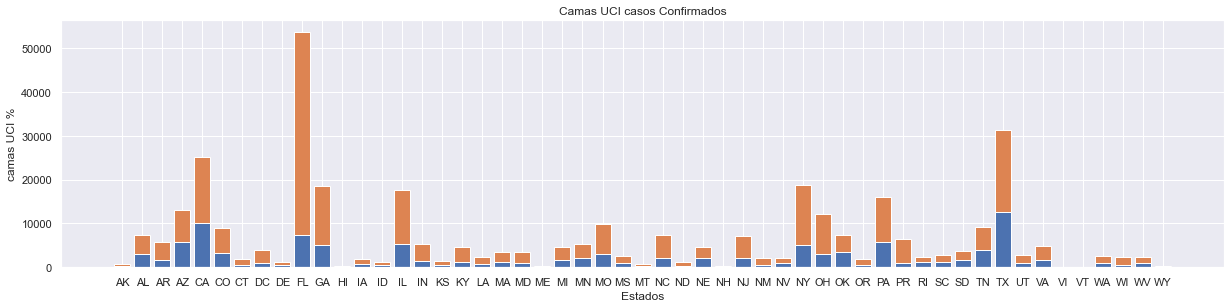

In [90]:
x=df_Ped.Estado
y=df_Ped.CH_Conf_Pedia_lab_total
y2=df_Ped.C_Conf_Sos_Pedia_Lab_Total

## Creamos Gráfica
plt.bar(x,y,label='Total camas UCI')
plt.bar(x,y2,label='UCI confirmados COVID-19',bottom=y)


plt.gcf().set_size_inches(17,4)
plt.tight_layout()
plt.ylabel('camas UCI %')
plt.xlabel('Estados')
plt.title('Camas UCI casos Confirmados')
plt.xticks(rotation=0)
plt.show

en este grafico podemos apreciar con el color naranja el total de camas de hospitalizacion para pacientes pediatricos manteniendo el dominio los estados focos de la epidemia.

- Las autoridades de EE. UU. confirmaron un creciente número de contagios y hospitalizaciones por Covid-19 en la población más joven. Con un promedio de 672 niños internados a diario durante la última semana, la nación registra las cifras más altas de menores recluidos en centros médicos desde que inició la pandemia, según datos de los Centros para el Control y la Prevención de Enfermedades. Muchos de los pequeños afectados no tienen la edad suficiente para ser vacunados.

porcentaje de camas UCI correspondiente a casos confirmados de COVID-19

In [54]:
df_UCI_porc=df_UCI_5.groupby(by='Estado',as_index=False).sum()
df_UCI_porc['Porc_Camas_UCI']=(df_UCI_porc.UCI_Conf/df_UCI_porc.totalcamasUCI)*100 #porcentaje de camas UCI casos confirmados 
df_UCI_porc

,Estado,totalcamasUCI,UCI_Conf,Porc_Camas_UCI
0,AK,70658,11233,15.897704
1,AL,999209,218865,21.903826
2,AR,542876,140345,25.852128
3,AS,1322,2,0.151286
4,AZ,912261,237500,26.034216
5,CA,4003467,898409,22.440774
6,CO,651338,148182,22.750400
7,CT,436704,59594,13.646314
8,DC,194654,21302,10.943520
9,DE,108315,16809,15.518626


<function matplotlib.pyplot.show(close=None, block=None)>

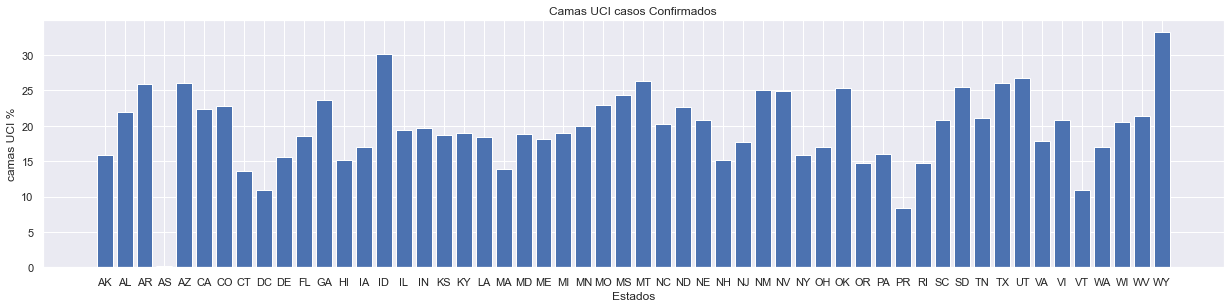

In [55]:

x=df_UCI_porc.Estado
y=df_UCI_porc.Porc_Camas_UCI

## Creamos Gráfica
plt.bar(x,y)
plt.gcf().set_size_inches(17,4)
plt.tight_layout()
plt.ylabel('camas UCI %')
plt.xlabel('Estados')
plt.title('Camas UCI casos Confirmados')
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

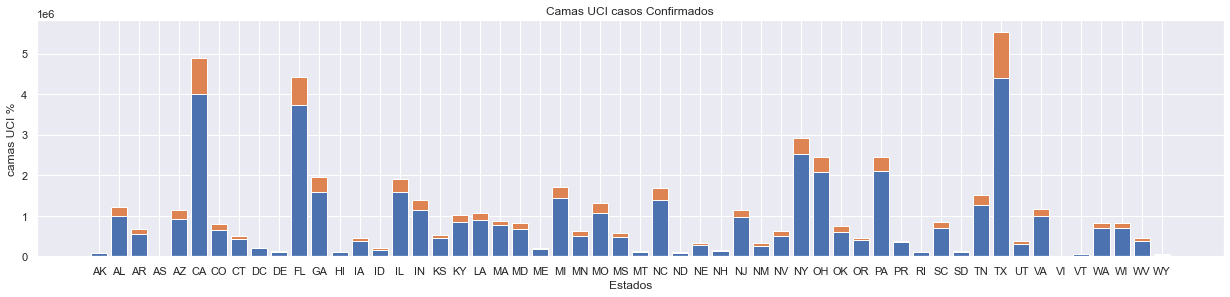

In [56]:
x=df_UCI_porc.Estado
y=df_UCI_porc.totalcamasUCI
y2=df_UCI_porc.UCI_Conf

## Creamos Gráfica
plt.bar(x,y,label='Total camas UCI')
plt.bar(x,y2,label='UCI confirmados COVID-19',bottom=y)


plt.gcf().set_size_inches(17,4)
plt.tight_layout()
plt.ylabel('camas UCI %')
plt.xlabel('Estados')
plt.title('Camas UCI casos Confirmados')
plt.xticks(rotation=0)
plt.show

muertes por covid que hubo en el estado durante el año 2021

In [15]:
dicc={}
dicc['Estado']=results_df.state
dicc['Fecha']=results_df.date
dicc['Muertes_Covid']=results_df.deaths_covid
#Número de hospitales que reportan una escasez crítica de personal hoy en día en este estado.
dicc['Escases_Critica_Personal']=results_df.critical_staffing_shortage_today_yes



In [16]:
df_Death=pd.DataFrame(dicc)
df_Death.Fecha=pd.to_datetime(df_Death.Fecha,format='%Y-%m-%d')
df_Death=df_Death.fillna(0)
df_Death['Muertes_Covid']=df_Death['Muertes_Covid'].astype('int64')
df_Death=df_Death.sort_values(by='Fecha',ascending=True)
df_mes=df_Death
df_Death

,Estado,Fecha,Muertes_Covid,Escases_Critica_Personal
18043,NC,2020-01-01,0,0
13747,HI,2020-01-01,0,0
16213,PR,2020-01-01,0,0
70,AL,2020-01-01,0,0
20882,IN,2020-01-01,0,0
...,...,...,...,...
34805,IA,2022-08-04,5,1
45942,PR,2022-08-04,0,0
40830,WI,2022-08-04,0,21
44482,IN,2022-08-04,5,10


In [141]:
# filtro fechas
df_Death=df_Death[(df_Death.Fecha >= '2021-01-01') & (df_Death.Fecha <= '2021-12-31')]
df_Death=df_Death.groupby(by='Estado',as_index=False).sum()
df_Death

,Estado,Muertes_Covid,Escases_Critica_Personal
0,AK,614,843
1,AL,6390,11085
2,AR,3582,6148
3,AS,0,0
4,AZ,16250,10783
5,CA,35108,35082
6,CO,2835,3751
7,CT,2725,741
8,DC,532,0
9,DE,562,428


<function matplotlib.pyplot.show(close=None, block=None)>

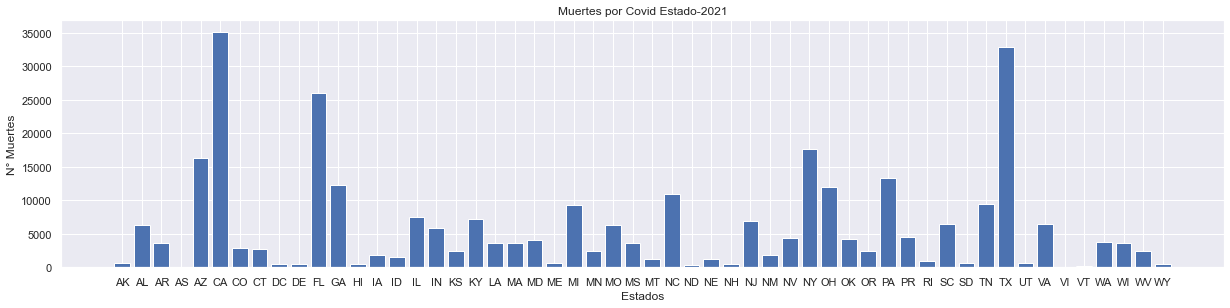

In [142]:
x=df_Death.Estado
y=df_Death.Muertes_Covid

## Creamos Gráfica
plt.bar(x,y)
plt.gcf().set_size_inches(17,4)
plt.tight_layout()
plt.ylabel('N° Muertes')
plt.xlabel('Estados')
plt.title('Muertes por Covid Estado-2021')
plt.xticks(rotation=0)
plt.show

total de muertes por estado

In [143]:
df_Death

,Estado,Muertes_Covid,Escases_Critica_Personal
0,AK,614,843
1,AL,6390,11085
2,AR,3582,6148
3,AS,0,0
4,AZ,16250,10783
5,CA,35108,35082
6,CO,2835,3751
7,CT,2725,741
8,DC,532,0
9,DE,562,428


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

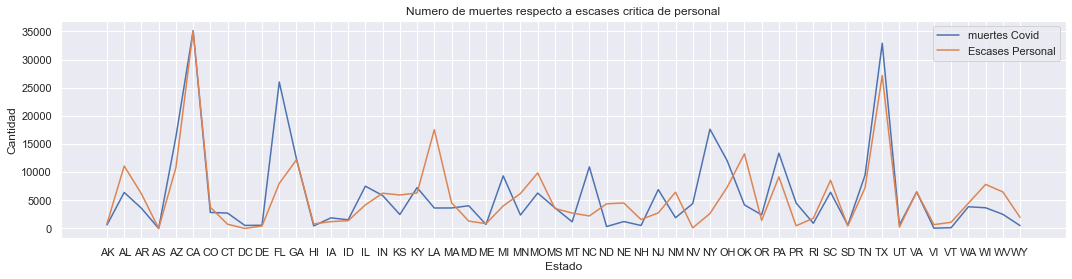

In [144]:
x=df_Death.Estado
y1=df_Death.Muertes_Covid
y2=df_Death.Escases_Critica_Personal

fig = plt.figure()
ax = plt.axes()

ax.plot(x,y1)
ax.plot(x,y2)
ax.set(xlabel='Estado', ylabel='Cantidad',title='Numero de muertes respecto a escases critica de personal')
ax.legend(['muertes Covid','Escases Personal'])

plt.gcf().set_size_inches(18,4)

plt.imshow


Se puede apreciar que en algunos estados, la implicacion de una escases critica de personal igualmente se ve reflejada en un aumento en el numero de reportados por muerte de COVID-19, haciendo notable la importancia de contar con estos recursos humanos para los hospitales. 

El peor mes de la pandemia para USA en su conjunto 

In [22]:
df_mes['UCI_Confirmados']=results_df.staffed_icu_adult_patients_confirmed_covid
df_mes['Casos_Covid_lab']=results_df.total_adult_patients_hospitalized_confirmed_and_suspected_covid
df_mes=df_mes.fillna(0)
df_mes['UCI_Confirmados']=df_mes['UCI_Confirmados'].astype('int64')
df_mes['Casos_Covid_lab']=df_mes['Casos_Covid_lab'].astype('int64')
df_mes
#df_mes.reset_index(drop=True)

,Estado,Fecha,Muertes_Covid,Escases_Critica_Personal,UCI_Confirmados,Casos_Covid_lab
18043,NC,2020-01-01,0,0,0,0
13747,HI,2020-01-01,0,0,0,0
16213,PR,2020-01-01,0,0,0,0
70,AL,2020-01-01,0,0,0,0
20882,IN,2020-01-01,0,0,0,0
...,...,...,...,...,...,...
34805,IA,2022-08-04,5,1,41,328
45942,PR,2022-08-04,0,0,46,324
40830,WI,2022-08-04,0,21,88,572
44482,IN,2022-08-04,5,10,95,783


obtencion del total de los datos por cada uno de los meses dentro de los periodos de años

In [ ]:
dic={}
diccp={}
for i in range(0,df_mes.shape[0]):
      x=str(df_mes.Fecha[i].year)+'-'+str(df_mes.Fecha[i].month)  #almaceno el dato del numero del mes y su respectivo año
      if x not in dic:
            dic[x]=0
      dic[x]+=(df_mes.Muertes_Covid[i])  #total muertes covid en ese Mes 

dic

In [38]:
df_1=pd.DataFrame(dic.items())
df_1=df_1.rename(columns={0:'mes',1:'Muertes_Covid'})
df_1.mes=pd.to_datetime(df_1.mes)
df_1=df_1.sort_values(by='mes',ascending=True)
df_1=df_1.reset_index(drop=True)

df_1

,mes,Muertes_Covid
0,2020-01-01,145
1,2020-02-01,0
2,2020-03-01,1118
3,2020-04-01,33572
4,2020-05-01,54884
5,2020-06-01,17541
6,2020-07-01,19178
7,2020-08-01,31259
8,2020-09-01,15244
9,2020-10-01,17963


In [ ]:
dic={}
diccp={}
for i in range(0,df_mes.shape[0]):
      x=str(df_mes.Fecha[i].year)+'-'+str(df_mes.Fecha[i].month)  #almaceno el dato del numero del mes y su respectivo año
      if x not in dic:
            dic[x]=0
      dic[x]+=(df_mes.Escases_Critica_Personal[i])  #total escases critica de personal en ese Mes 

dic

In [40]:
df_2=pd.DataFrame(dic.items())
df_2=df_2.rename(columns={0:'mes',1:'Escases_Critica_Personal'})
df_2.mes=pd.to_datetime(df_2.mes)
df_2=df_2.sort_values(by='mes',ascending=True)
df_2=df_2.reset_index(drop=True)

In [ ]:
dic={}
diccp={}
for i in range(0,df_mes.shape[0]):
      x=str(df_mes.Fecha[i].year)+'-'+str(df_mes.Fecha[i].month)  #almaceno el dato del numero del mes y su respectivo año
      if x not in dic:
            dic[x]=0
      dic[x]+=(df_mes.UCI_Confirmados[i])  #total UCI confirmados en ese Mes 

dic

In [42]:
df_3=pd.DataFrame(dic.items())
df_3=df_3.rename(columns={0:'mes',1:'UCI_Confirmados'})
df_3.mes=pd.to_datetime(df_3.mes)
df_3=df_3.sort_values(by='mes',ascending=True)
df_3=df_3.reset_index(drop=True)

In [ ]:
dic={}
diccp={}
for i in range(0,df_mes.shape[0]):
      x=str(df_mes.Fecha[i].year)+'-'+str(df_mes.Fecha[i].month)  #almaceno el dato del numero del mes y su respectivo año
      if x not in dic:
            dic[x]=0
      dic[x]+=(df_mes.Casos_Covid_lab[i])  #total casos covid hospitalizados en ese Mes 

dic

In [44]:
df_4=pd.DataFrame(dic.items())
df_4=df_4.rename(columns={0:'mes',1:'Casos_Covid_lab'})
df_4.mes=pd.to_datetime(df_4.mes)
df_4=df_4.sort_values(by='mes',ascending=True)
df_4=df_4.reset_index(drop=True)
df_4

,mes,Casos_Covid_lab
0,2020-01-01,9365
1,2020-02-01,0
2,2020-03-01,2769
3,2020-04-01,92874
4,2020-05-01,26645
5,2020-06-01,19051
6,2020-07-01,971635
7,2020-08-01,1545925
8,2020-09-01,1075842
9,2020-10-01,1345734


agrupamiento de cada uno de los data frames

In [45]:
datos=df_1.merge(df_2,how='left',on='mes').merge(df_3,how='left',on='mes').merge(df_4,how='left',on='mes')
datos

,mes,Muertes_Covid,Escases_Critica_Personal,UCI_Confirmados,Casos_Covid_lab
0,2020-01-01,145,80,1985,9365
1,2020-02-01,0,0,0,0
2,2020-03-01,1118,0,0,2769
3,2020-04-01,33572,30,704,92874
4,2020-05-01,54884,6,771,26645
5,2020-06-01,17541,48,303,19051
6,2020-07-01,19178,10028,213789,971635
7,2020-08-01,31259,24210,373108,1545925
8,2020-09-01,15244,25950,251095,1075842
9,2020-10-01,17963,29015,301908,1345734


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

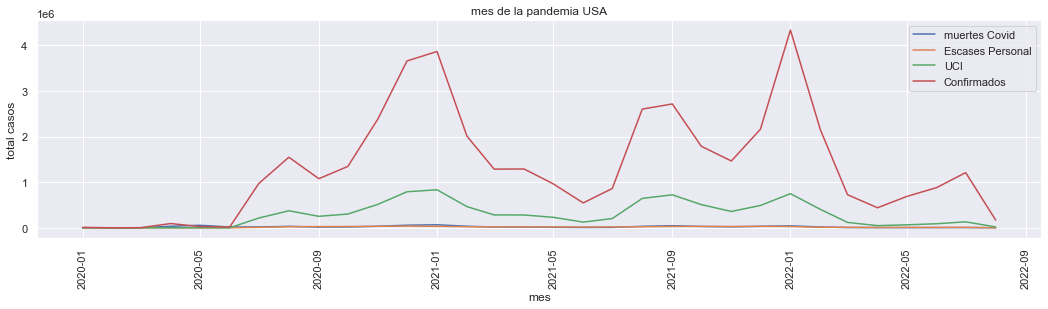

In [46]:
x=datos.mes
y1=datos.Muertes_Covid
y2=datos.Escases_Critica_Personal
y3=datos.UCI_Confirmados
y4=datos.Casos_Covid_lab

fig = plt.figure()
ax = plt.axes()

ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)
ax.plot(x,y4)
ax.set(xlabel='mes', ylabel='total casos',title='mes de la pandemia USA')
ax.legend(['muertes Covid','Escases Personal','UCI','Confirmados'])


plt.gcf().set_size_inches(18,4)
plt.xticks(rotation=90)

plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

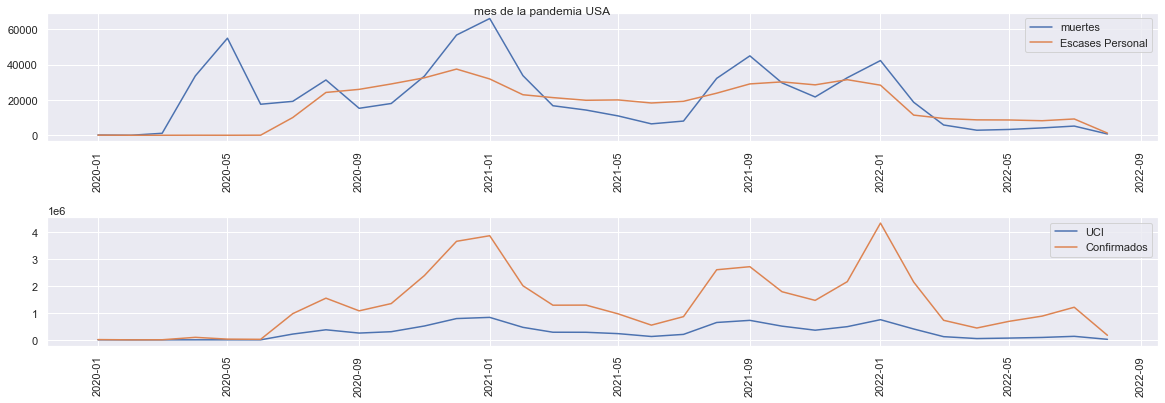

In [47]:
x=datos.mes
y1=datos.Muertes_Covid
y2=datos.Escases_Critica_Personal
y3=datos.UCI_Confirmados
y4=datos.Casos_Covid_lab


plt.subplot(2,1,1)
plt.plot(x,y1)
plt.plot(x,y2)
#plt.axis('off')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(['muertes','Escases Personal'])

plt.subplot(2,1,2)
plt.plot(x,y3)
plt.plot(x,y4)

plt.legend(['UCI','Confirmados'])
plt.suptitle('mes de la pandemia USA')

#ax.set(xlabel='mes', ylabel='total casos',title='mes de la pandemia USA')
#ax.legend(['muertes Covid','Escases Personal','UCI','Confirmados'])

plt.gcf().set_size_inches(18,5)
plt.xticks(rotation=90)

plt.imshow

segun como se puede apreciar en el grafico anterior el peor mes de la pandemia de COVID-19 para USD, es el mes de Enero correspondiente al año 2021, debido a un aumento de los casos confirmados de COVID-19, Impulsados por reuniones festivas, en todo el pais y correspondiente tambien a un aumento récord de hospitalzaiciones.(CNN en español). <br>
tambien se puede apreciar que en esas fechas los hospitales venian registrando una escases critica de personal lo cual influye mucho en las condiciones en las que se puede hacer frente a la crisis sanitaria
